In [1]:
pip install pandas numpy matplotlib seaborn scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load data - use read_excel for .xlsx files
df = pd.read_excel('online_retail.xlsx', sheet_name='Online Retail')   # ← this is the key change


# Preview
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nInfo:")
print(df.info())
print("\nBasic stats:")
print(df.describe())

print("\nData loaded successfully!")

Dataset shape: (541909, 8)

First 5 rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Cou

In [4]:

print("Original shape:", df.shape)
print("Missing values per column:\n", df.isnull().sum())

# 1. Drop rows with missing CustomerID (important for customer-level analysis)
df = df.dropna(subset=['CustomerID'])

# 2. Convert InvoiceDate to datetime (if not already)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 3. Remove cancelled/negative quantity transactions
# (Invoices starting with 'C' or negative Quantity usually mean returns/cancellations)
df = df[df['Quantity'] > 0]
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]  # optional extra filter

# 4. Remove rows with zero or negative UnitPrice (invalid)
df = df[df['UnitPrice'] > 0]

# 5. Create useful derived columns
df['TotalPrice']    = df['Quantity'] * df['UnitPrice']
df['YearMonth']     = df['InvoiceDate'].dt.to_period('M')          # for time-based analysis
df['Hour']          = df['InvoiceDate'].dt.hour
df['DayOfWeek']     = df['InvoiceDate'].dt.day_name()

# 6. Handle outliers (simple cap at 99th percentile for Quantity & UnitPrice)
q99_qty   = df['Quantity'].quantile(0.99)
q99_price = df['UnitPrice'].quantile(0.99)
df = df[(df['Quantity'] <= q99_qty) & (df['UnitPrice'] <= q99_price)]

# Final shape after cleaning
print("\nShape after cleaning:", df.shape)
print("Missing values after cleaning:\n", df.isnull().sum())
print("\nSample after cleaning:")
print(df.head())

print("\nPreprocessing completed!")

Original shape: (541909, 8)
Missing values per column:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Shape after cleaning: (390260, 12)
Missing values after cleaning:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
YearMonth      0
Hour           0
DayOfWeek      0
dtype: int64

Sample after cleaning:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          Inv

Numeric summary after cleaning:
            Quantity                    InvoiceDate      UnitPrice  \
count  390260.000000                         390260  390260.000000   
mean        9.911772  2011-07-11 01:43:54.233690368       2.726414   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 15:00:00       1.950000   
75%        12.000000            2011-10-20 15:57:00       3.750000   
max       120.000000            2011-12-09 12:50:00      14.950000   
std        14.581911                            NaN       2.540929   

          CustomerID     TotalPrice           Hour  
count  390260.000000  390260.000000  390260.000000  
mean    15302.815067      17.732098      12.734892  
min     12347.000000       0.001000       6.000000  
25%     13975.000000       4.550000      11.000000  
50%     15167.000000      11.250000      13.000000  
75%     16804.00000

C:\Users\DELL\AppData\Local\Temp\ipykernel_40160\2887628748.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_countries.values, y=top10_countries.index, palette='viridis')


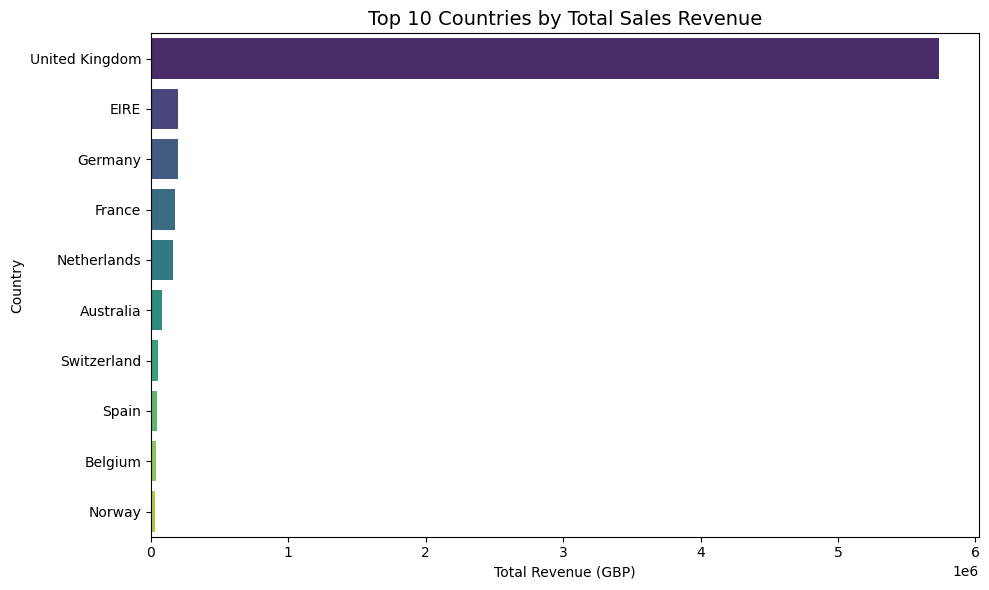


Top 10 Products by Quantity Sold:
StockCode  Description                       
85099B     JUMBO BAG RED RETROSPOT               29971
85123A     WHITE HANGING HEART T-LIGHT HOLDER    23417
21212      PACK OF 72 RETROSPOT CAKE CASES       22893
84879      ASSORTED COLOUR BIRD ORNAMENT         22154
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     21535
22178      VICTORIAN GLASS HANGING T-LIGHT       17243
20725      LUNCH BAG RED RETROSPOT               16947
22197      POPCORN HOLDER                        15139
23084      RABBIT NIGHT LIGHT                    14230
22386      JUMBO BAG PINK POLKADOT               13765
Name: Quantity, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_40160\2887628748.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_qty.values, y=product_qty.index.get_level_values('Description'), palette='magma')


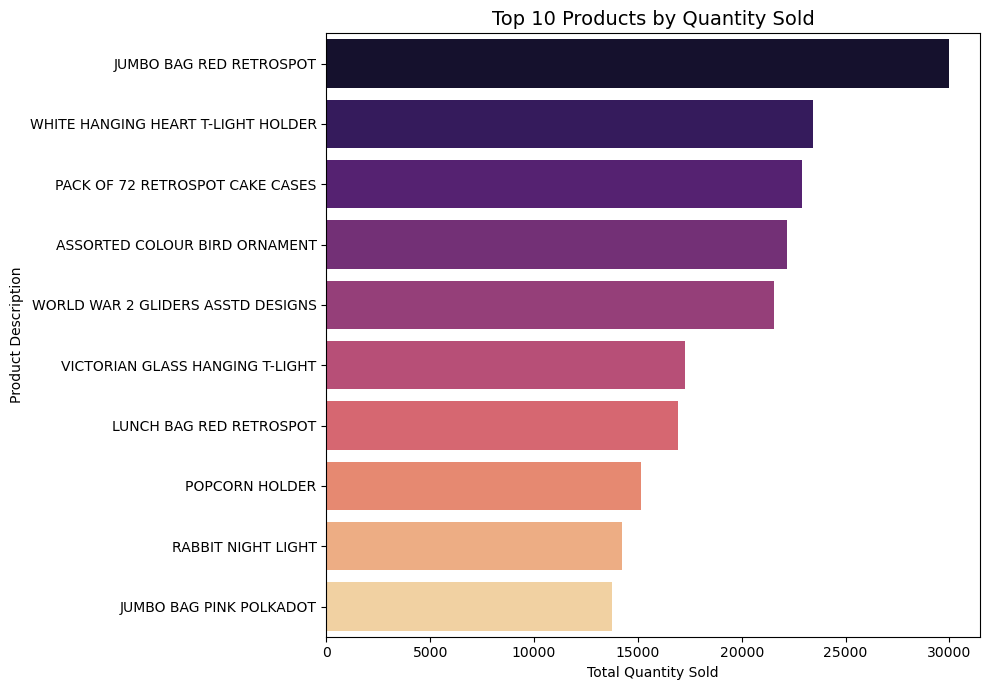

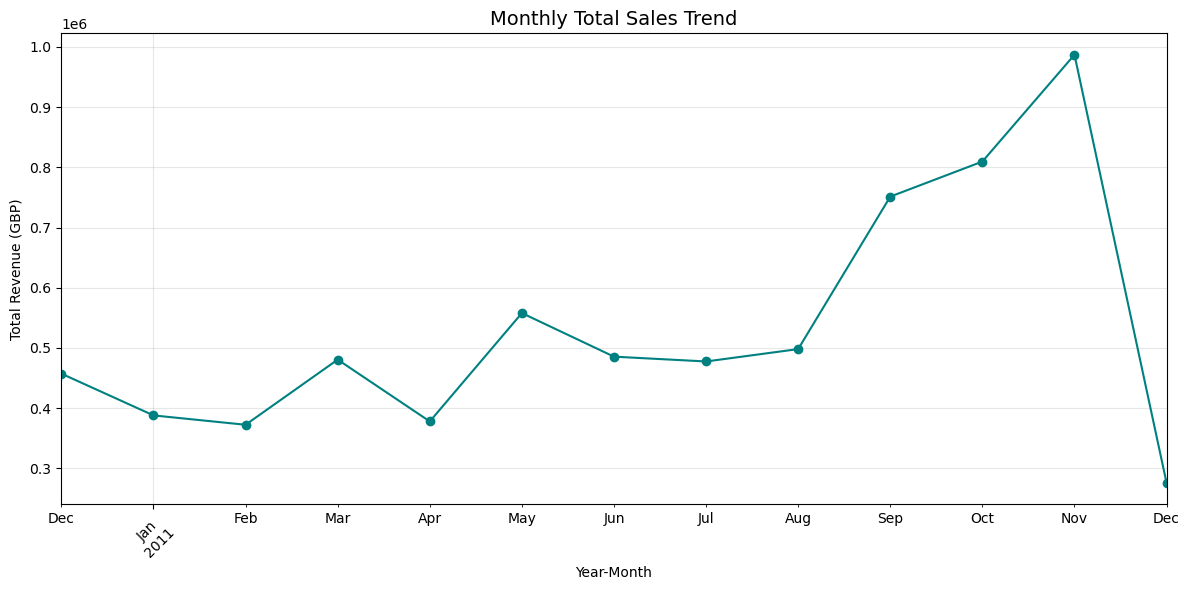

C:\Users\DELL\AppData\Local\Temp\ipykernel_40160\2887628748.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dow_sales.index, y=dow_sales.values, palette='coolwarm')


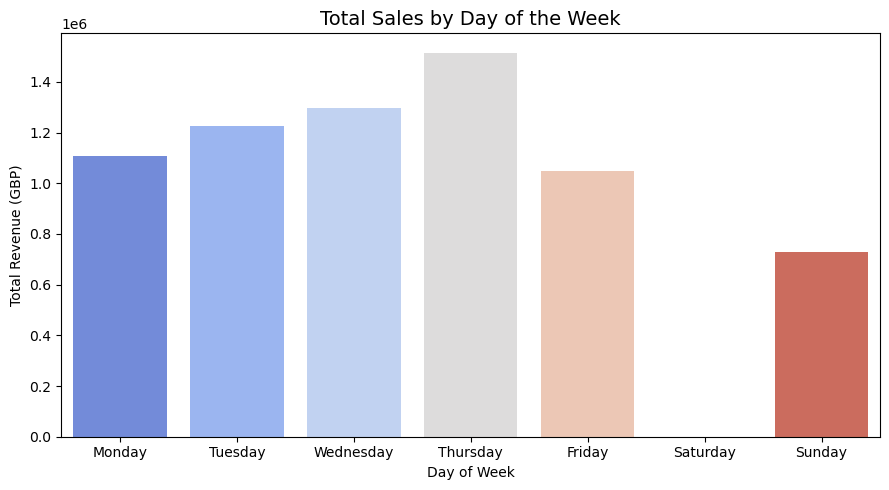


EDA visualizations saved as PNG files.


In [5]:
# ────────────────────────────────────────────────
# Summary statistics of numeric columns
print("Numeric summary after cleaning:")
print(df.describe())

# ────────────────────────────────────────────────
# 1. Top 10 countries by total revenue
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
top10_countries = country_sales.head(10)

print("\nTop 10 Countries by Total Revenue:")
print(top10_countries)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_countries.values, y=top10_countries.index, palette='viridis')
plt.title('Top 10 Countries by Total Sales Revenue', fontsize=14)
plt.xlabel('Total Revenue (GBP)')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top_10_countries.png', dpi=150, bbox_inches='tight')
plt.show()

# ────────────────────────────────────────────────
# 2. Top 10 products by quantity sold
product_qty = df.groupby(['StockCode', 'Description'])['Quantity'].sum() \
                .sort_values(ascending=False).head(10)

print("\nTop 10 Products by Quantity Sold:")
print(product_qty)

# Plot
plt.figure(figsize=(10, 7))
sns.barplot(x=product_qty.values, y=product_qty.index.get_level_values('Description'), palette='magma')
plt.title('Top 10 Products by Quantity Sold', fontsize=14)
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.tight_layout()
plt.savefig('top_10_products_quantity.png', dpi=150, bbox_inches='tight')
plt.show()

# ────────────────────────────────────────────────
# 3. Monthly sales trend
monthly_sales = df.groupby('YearMonth')['TotalPrice'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Total Sales Trend', fontsize=14)
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue (GBP)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('monthly_sales_trend.png', dpi=150, bbox_inches='tight')
plt.show()

# ────────────────────────────────────────────────
# 4. Sales by day of week
dow_sales = df.groupby('DayOfWeek')['TotalPrice'].sum() \
              .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(9, 5))
sns.barplot(x=dow_sales.index, y=dow_sales.values, palette='coolwarm')
plt.title('Total Sales by Day of the Week', fontsize=14)
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue (GBP)')
plt.tight_layout()
plt.savefig('sales_by_dayofweek.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nEDA visualizations saved as PNG files.")